In [2]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
import plotly.graph_objs as go
import plotly.offline as py
import scipy
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.regression.linear_model import  OLS
from statsmodels.stats.anova import anova_lm
from scipy import stats
pd.pandas.set_option('display.max_columns',None)
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_excel('customer_churn_large_dataset.xlsx')
df.head()

,CustomerID,Name,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,1,Customer_1,63,Male,Los Angeles,17,73.36,236,0
1,2,Customer_2,62,Female,New York,1,48.76,172,0
2,3,Customer_3,24,Female,Los Angeles,5,85.47,460,0
3,4,Customer_4,36,Female,Miami,3,97.94,297,1
4,5,Customer_5,46,Female,Miami,19,58.14,266,0


# 5-point summary

In [4]:
df.describe()

,CustomerID,Age,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,50000.500000,44.027020,12.490100,65.053197,274.393650,0.497790
std,28867.657797,15.280283,6.926461,20.230696,130.463063,0.499998
min,1.000000,18.000000,1.000000,30.000000,50.000000,0.000000
25%,25000.750000,31.000000,6.000000,47.540000,161.000000,0.000000
50%,50000.500000,44.000000,12.000000,65.010000,274.000000,0.000000
75%,75000.250000,57.000000,19.000000,82.640000,387.000000,1.000000
max,100000.000000,70.000000,24.000000,100.000000,500.000000,1.000000


In [5]:
df.describe(include='object')

,Name,Gender,Location
count,100000,100000,100000
unique,100000,2,5
top,Customer_1,Female,Houston
freq,1,50216,20157


In [6]:
df.shape    

(100000, 9)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CustomerID                  100000 non-null  int64  
 1   Name                        100000 non-null  object 
 2   Age                         100000 non-null  int64  
 3   Gender                      100000 non-null  object 
 4   Location                    100000 non-null  object 
 5   Subscription_Length_Months  100000 non-null  int64  
 6   Monthly_Bill                100000 non-null  float64
 7   Total_Usage_GB              100000 non-null  int64  
 8   Churn                       100000 non-null  int64  
dtypes: float64(1), int64(5), object(3)
memory usage: 6.9+ MB


In [8]:
# check for null values
df.isnull().sum()

CustomerID                    0
Name                          0
Age                           0
Gender                        0
Location                      0
Subscription_Length_Months    0
Monthly_Bill                  0
Total_Usage_GB                0
Churn                         0
dtype: int64

In [9]:
# drop unwanted columns
df.drop(columns=['CustomerID','Name'],inplace=True)

In [10]:
# churn is missclassified as numeric type
df['Churn'] = df['Churn'].astype('object')

# EDA

In [11]:
numeric_df = df.select_dtypes(include='number')
cat_df = df.select_dtypes(include='object')

In [12]:
# unvariate analysis
def univariateAnalysis_numeric(column,nbins):
    print("Description of " + column)
    print("----------------------------------------------------------------------------")
    print(df[column].describe(),end='\n')
    
    print("\n Skewness of " + column)
    print("----------------------------------------------------------------------------")
    print(np.round(df[column].skew(),4),end='\n')
    
    print("\n Histogram and Boxplot of " + column)
    print("----------------------------------------------------------------------------")
    fig,axs = plt.subplots(nrows=1,ncols=2, figsize=(14,5))
    print(sns.kdeplot(df[column], ax=axs[0],color='b',shade=True))
    print(sns.boxplot(x=df[column], ax=axs[1],color='r'))
    plt.show();

Description of Age
----------------------------------------------------------------------------
count    100000.000000
mean         44.027020
std          15.280283
min          18.000000
25%          31.000000
50%          44.000000
75%          57.000000
max          70.000000
Name: Age, dtype: float64

 Skewness of Age
----------------------------------------------------------------------------
-0.0027

 Histogram and Boxplot of Age
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


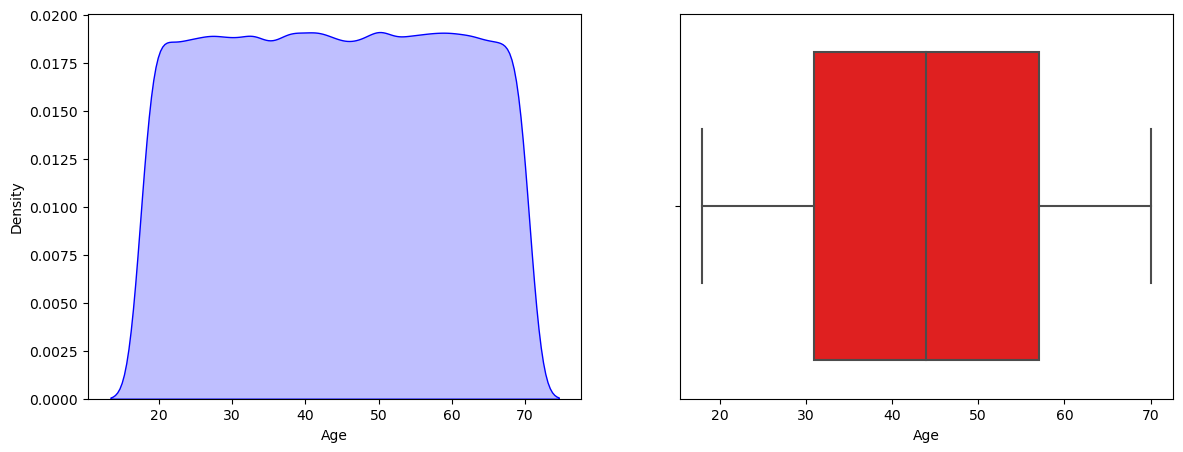

Description of Subscription_Length_Months
----------------------------------------------------------------------------
count    100000.000000
mean         12.490100
std           6.926461
min           1.000000
25%           6.000000
50%          12.000000
75%          19.000000
max          24.000000
Name: Subscription_Length_Months, dtype: float64

 Skewness of Subscription_Length_Months
----------------------------------------------------------------------------
-0.0017

 Histogram and Boxplot of Subscription_Length_Months
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


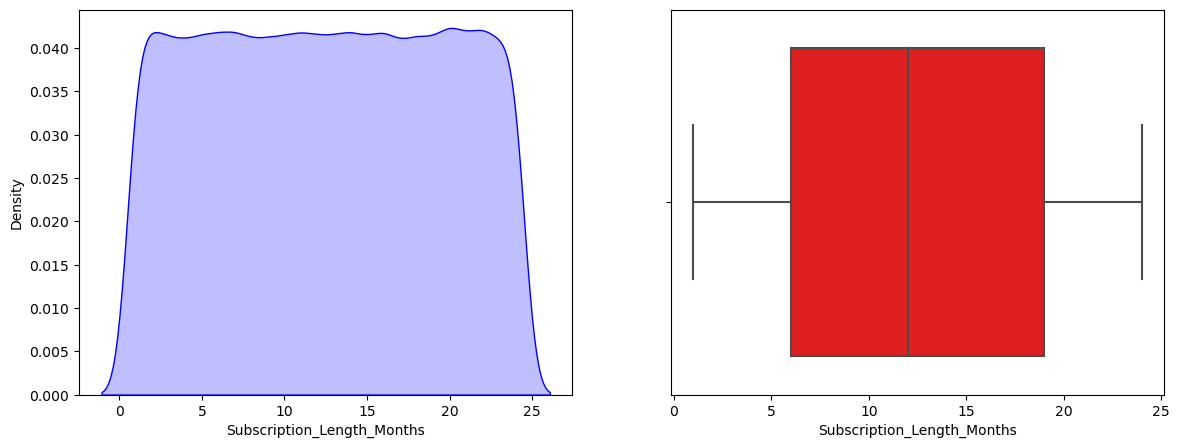

Description of Monthly_Bill
----------------------------------------------------------------------------
count    100000.000000
mean         65.053197
std          20.230696
min          30.000000
25%          47.540000
50%          65.010000
75%          82.640000
max         100.000000
Name: Monthly_Bill, dtype: float64

 Skewness of Monthly_Bill
----------------------------------------------------------------------------
-0.0003

 Histogram and Boxplot of Monthly_Bill
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


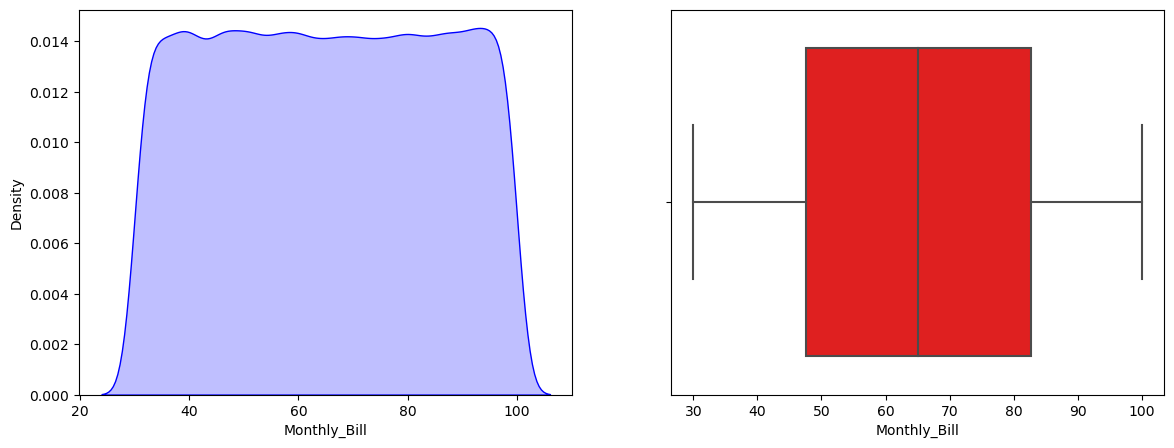

Description of Total_Usage_GB
----------------------------------------------------------------------------
count    100000.000000
mean        274.393650
std         130.463063
min          50.000000
25%         161.000000
50%         274.000000
75%         387.000000
max         500.000000
Name: Total_Usage_GB, dtype: float64

 Skewness of Total_Usage_GB
----------------------------------------------------------------------------
0.0071

 Histogram and Boxplot of Total_Usage_GB
----------------------------------------------------------------------------
Axes(0.125,0.11;0.352273x0.77)
Axes(0.547727,0.11;0.352273x0.77)


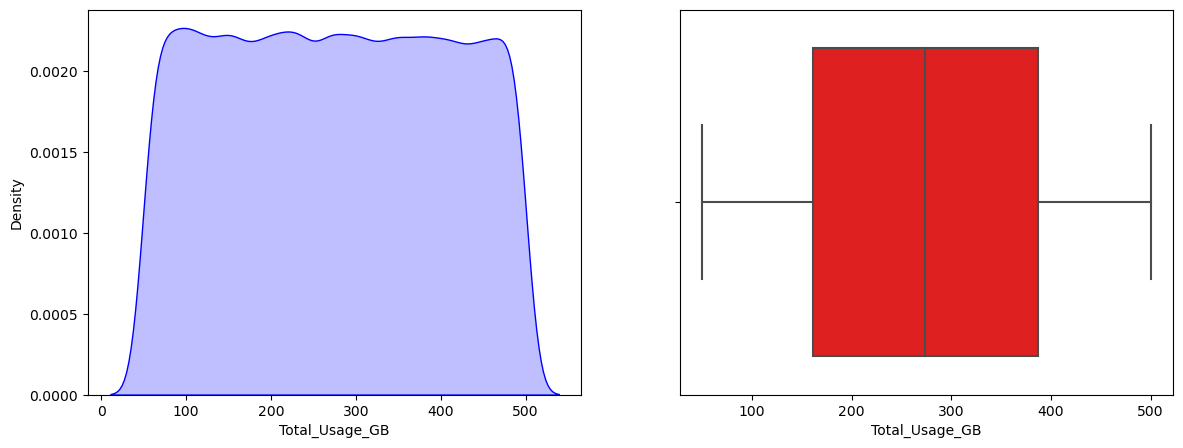

In [13]:
for i in numeric_df.columns:
    univariateAnalysis_numeric(i,7)

countplot of Age with respect to Churn
----------------------------------------------------------------------------


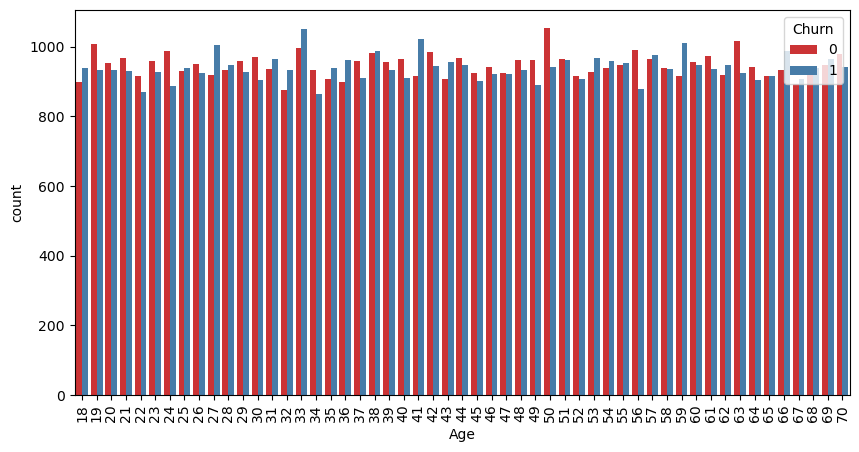

countplot of Subscription_Length_Months with respect to Churn
----------------------------------------------------------------------------


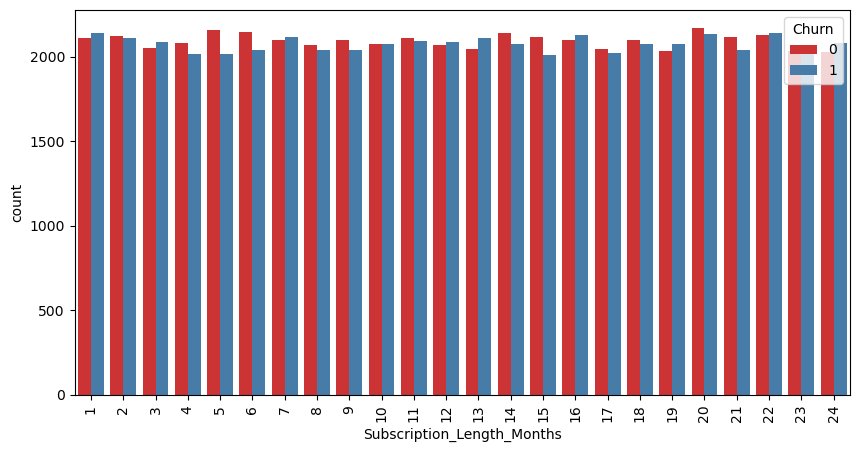

countplot of Monthly_Bill with respect to Churn
----------------------------------------------------------------------------


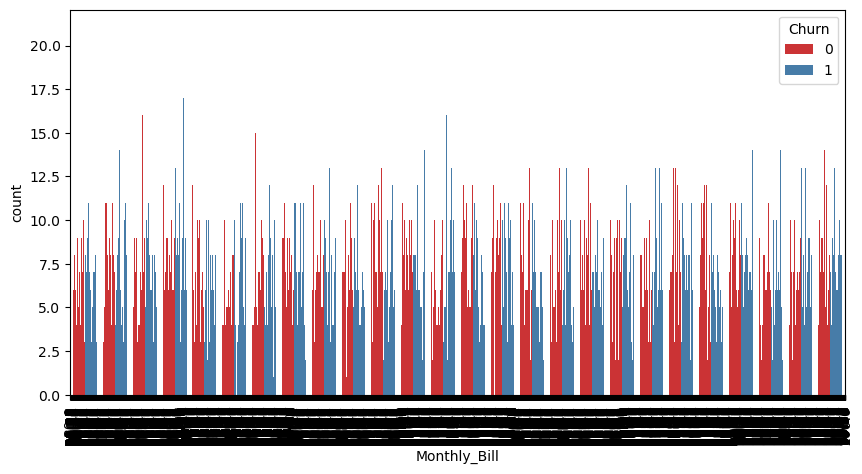

countplot of Total_Usage_GB with respect to Churn
----------------------------------------------------------------------------


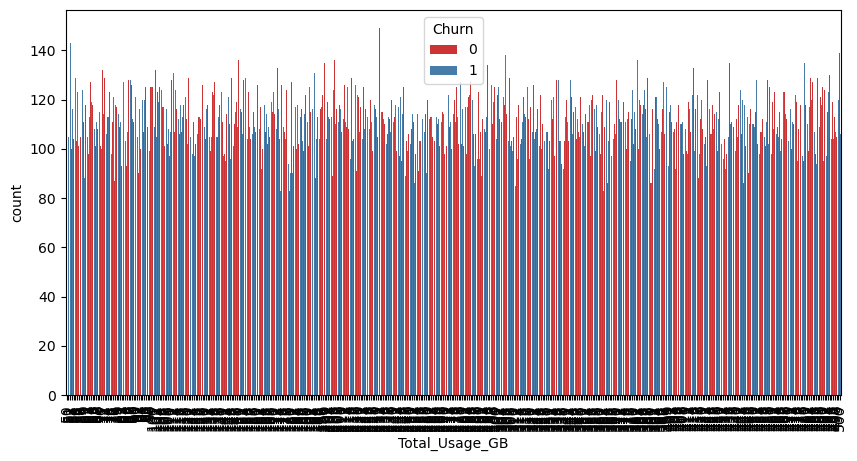

In [14]:
# bivariate analysis
for i in numeric_df.columns:
    plt.figure(figsize=(10,5))
    print("countplot of " + i + " with respect to Churn")
    print("----------------------------------------------------------------------------")
    # arrange the features in ascending order and 45 degree rotation
    sns.countplot(x=i,hue='Churn',data=df,order=sorted(df[i].unique()),palette='Set1')
    plt.xticks(rotation=90)
    plt.show();

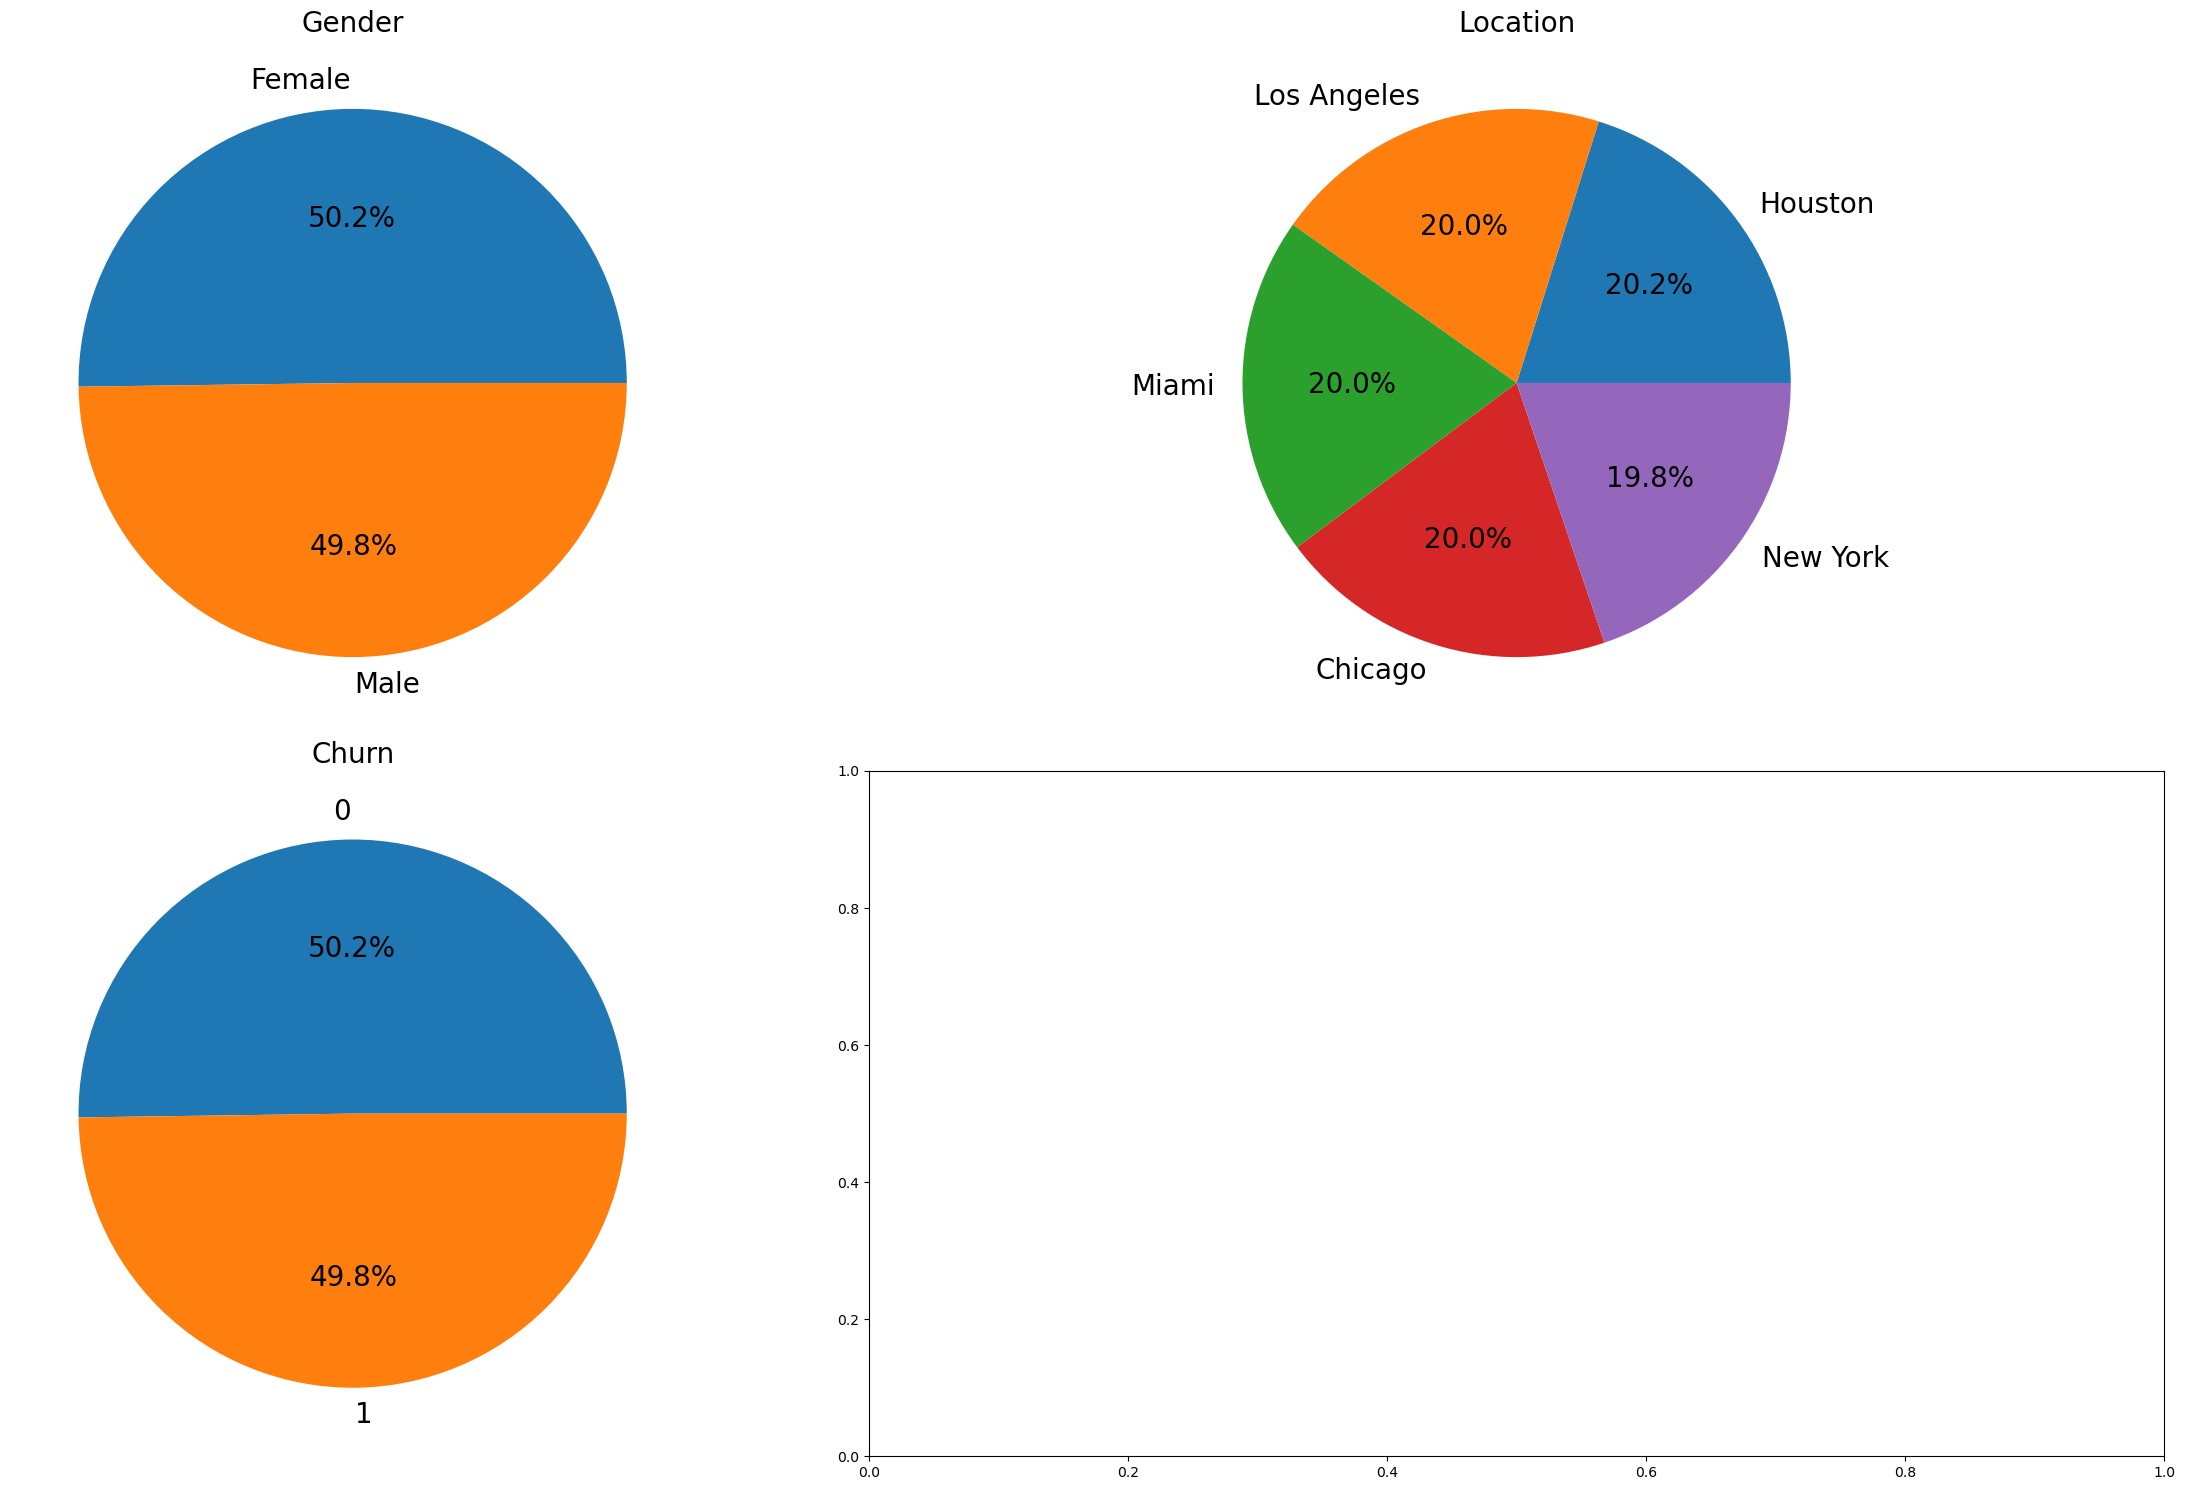

In [15]:
# pie charts
fig, ax= plt.subplots(2,2, figsize=(25,15))
for i, subplot in zip(cat_df.columns, ax.flatten()):
    df[i].value_counts().plot(kind='pie', ax=subplot, autopct='%1.1f%%', fontsize=20)
    subplot.set_title(i, fontsize=20)
    subplot.set_ylabel('')
plt.tight_layout()


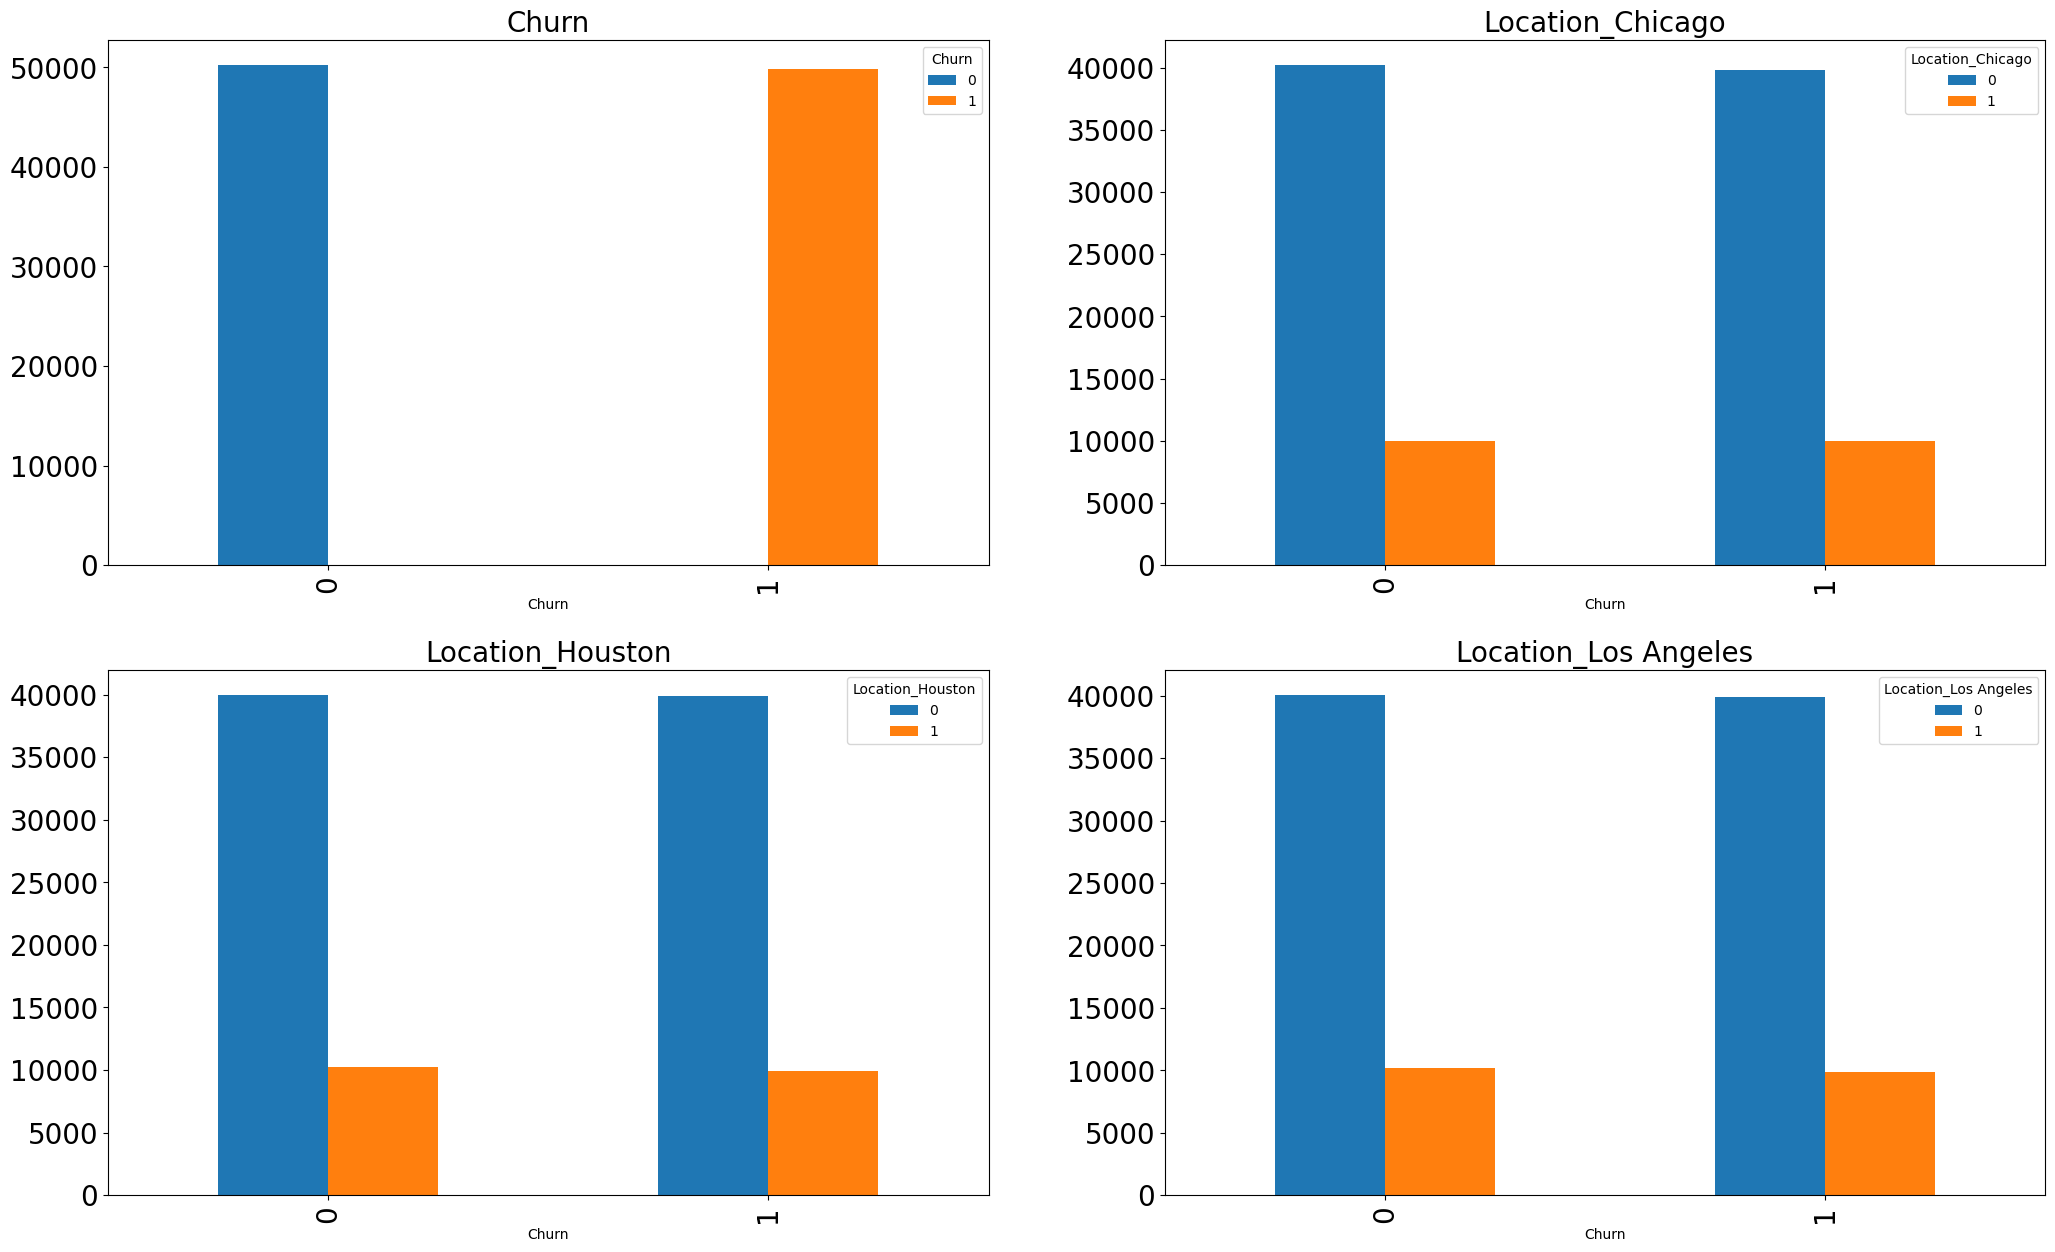

In [16]:
# locations vs churn
dfx = df.copy()
dfx = pd.get_dummies(dfx,columns=['Location'])
dfx.drop(columns=['Age','Gender','Subscription_Length_Months','Monthly_Bill','Total_Usage_GB'],inplace=True)
# plot churn vs different locations
fig, ax= plt.subplots(2,2, figsize=(25,15))
for i, subplot in zip(dfx.columns, ax.flatten()):
    dfx.groupby(i)['Churn'].value_counts().unstack(0).plot(kind='bar', ax=subplot, fontsize=20)
    subplot.set_title(i, fontsize=20)
    subplot.set_ylabel('')

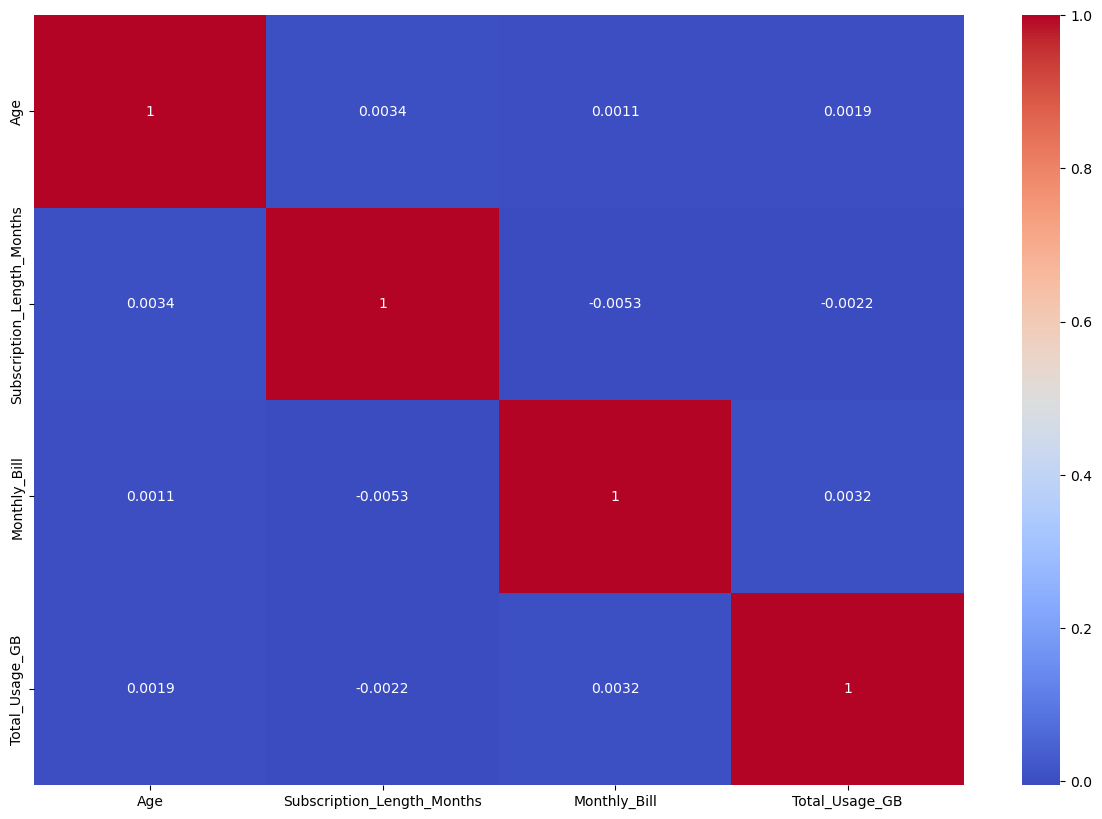

In [17]:
# correlation matrix
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')
plt.show();

# Statstical Analysis

In [18]:
df.head()

,Age,Gender,Location,Subscription_Length_Months,Monthly_Bill,Total_Usage_GB,Churn
0,63,Male,Los Angeles,17,73.36,236,0
1,62,Female,New York,1,48.76,172,0
2,24,Female,Los Angeles,5,85.47,460,0
3,36,Female,Miami,3,97.94,297,1
4,46,Female,Miami,19,58.14,266,0


In [19]:
# check for categorical feature independence
# chi-square test
# h0: feature is independent of target
# h1: feature is dependent of target
from scipy.stats import chi2_contingency
for i in cat_df.columns:
    print("chi-square test between Churn and " + i)
    print("----------------------------------------------------------------------------")
    print(chi2_contingency(pd.crosstab(df['Churn'],df[i])))
    
    pvalue = chi2_contingency(pd.crosstab(df['Churn'],df[i]))[1]
    if pvalue < 0.05:
        print("Reject H0, feature is dependent of target")
    else:
        print("Accept H0, feature is independent of target")
    print('\n')

chi-square test between Churn and Gender
----------------------------------------------------------------------------
Chi2ContingencyResult(statistic=0.4413972946971719, pvalue=0.5064488106432634, dof=1, expected_freq=array([[25218.97736, 25002.02264],
       [24997.02264, 24781.97736]]))
Accept H0, feature is independent of target


chi-square test between Churn and Location
----------------------------------------------------------------------------
Chi2ContingencyResult(statistic=10.404170106364795, pvalue=0.03414293762924668, dof=4, expected_freq=array([[10023.10718, 10123.04697, 10064.79061, 10059.76851,  9950.28673],
       [ 9934.89282, 10033.95303,  9976.20939,  9971.23149,  9862.71327]]))
Reject H0, feature is dependent of target


chi-square test between Churn and Churn
----------------------------------------------------------------------------
Chi2ContingencyResult(statistic=99995.99996185442, pvalue=0.0, dof=1, expected_freq=array([[25221.48841, 24999.51159],
       [24999

In [20]:
# check for numerical feature independence with categorical target
for i in numeric_df.columns:
    print("t-test between Churn and " + i)
    print("----------------------------------------------------------------------------")
    print(stats.ttest_ind(df[df['Churn']=='Yes'][i],df[df['Churn']=='No'][i]))
    
    pvalue = stats.ttest_ind(df[df['Churn']=='Yes'][i],df[df['Churn']=='No'][i])[1]
    if pvalue < 0.05:
        print("Reject H0, feature is dependent of target")
    else:
        print("Accept H0, feature is independent of target")
    print('\n')

t-test between Churn and Age
----------------------------------------------------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)
Accept H0, feature is independent of target


t-test between Churn and Subscription_Length_Months
----------------------------------------------------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)
Accept H0, feature is independent of target


t-test between Churn and Monthly_Bill
----------------------------------------------------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)
Accept H0, feature is independent of target


t-test between Churn and Total_Usage_GB
----------------------------------------------------------------------------
Ttest_indResult(statistic=nan, pvalue=nan)
Accept H0, feature is independent of target




In [21]:
# post hoc summary
def posthoc_summary(column):
    print("Post hoc summary for " + column)
    print("----------------------------------------------------------------------------")
    model = ols(column + ' ~ Churn', data=df).fit()
    print(model.summary())
    print("\n")

In [22]:
for i in numeric_df.columns:
    posthoc_summary(i)

Post hoc summary for Age
----------------------------------------------------------------------------
                            OLS Regression Results                            
Dep. Variable:                    Age   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.2430
Date:                Sat, 16 Sep 2023   Prob (F-statistic):              0.622
Time:                        12:38:46   Log-Likelihood:            -4.1455e+05
No. Observations:              100000   AIC:                         8.291e+05
Df Residuals:                   99998   BIC:                         8.291e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------

# Model Building

In [23]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, cohen_kappa_score, roc_auc_score, confusion_matrix, classification_report

def get_metrics(y_test, ypred):
    accuracy = accuracy_score(y_test, ypred)
    precision = precision_score(y_test, ypred)
    recall = recall_score(y_test, ypred)
    f1 = f1_score(y_test, ypred)
    kappa = cohen_kappa_score(y_test, ypred)
    auc = roc_auc_score(y_test, ypred)
    return accuracy, precision, recall, f1, kappa, auc

perf_score = pd.DataFrame(columns=["Model", "Accuracy","Recall","Precision","F1 Score"] )

def per_measures(model,test,pred):


  accuracy    =accuracy_score(test,pred)
  f1score     =f1_score(test,pred)
  recall      =recall_score(test,pred)
  precision   =precision_score(test,pred)
  # aic         = model.aic
  # reliability = cohen_kappa_score(test,pred)



  return (accuracy,recall,precision,f1score)

def update_performance (name,
                        model,
                        test,
                        pred
                           ):

    # assign 'comp_perf' as global variable
    global perf_score


    # append the results to the dataframe 'score_card'
    # 'ignore_index = True' do not consider the index labels
    perf_score = perf_score.append({'Model'       : name,
                                    'Accuracy'    : per_measures(model,test,pred)[0],
                                    'Recall'      : per_measures(model,test,pred)[1],
                                    'Precision'   : per_measures(model,test,pred)[2],
                                    'F1 Score'    : per_measures(model,test,pred)[3]
                                    # 'AIC'         : per_measures(model,ytest,ypred)[4],
                                    # 'Reliability' : per_measures(model,ytest,ypred)[5]

                                     },
                                   ignore_index = True)



In [24]:
# scale the numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_df_scaled = pd.DataFrame(scaler.fit_transform(numeric_df),columns=numeric_df.columns)
cat_df = df.select_dtypes(include='object')
# remove target variable
cat_df.drop(columns='Churn',inplace=True)
# one hot encoding
cat_df = pd.get_dummies(cat_df,drop_first=True)
# concat both numerical and categorical features
X = pd.concat([numeric_df_scaled,cat_df],axis=1)
# target variable
y = df['Churn'].astype('category').cat.codes

In [25]:
# split the data into train and test
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.3,random_state=42)
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(70000, 9) (30000, 9) (70000,) (30000,)


In [26]:
# check if the data is balanced or not
print(ytrain.value_counts())
print(ytest.value_counts())

0    35069
1    34931
dtype: int64
0    15152
1    14848
dtype: int64


The data seems to be balanced

Test performance of Logistic Regression
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.59      0.54     15152
           1       0.50      0.42      0.46     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

----------------------------------------------------------------------------
Train performance of Logistic Regression
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.58      0.54     35069
           1       0.50      0.43      0.46     34931

    accuracy                           0.50     70000
   macro avg       0.50      0.50      0.50     70000
weighted avg       0.50      0.50      0.50     70000

----------------------------------

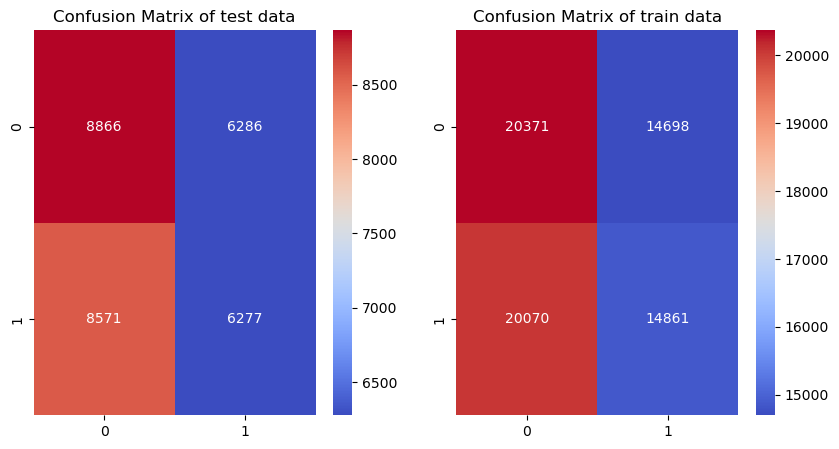

In [27]:
# logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(xtrain,ytrain)
ypred = lr.predict(xtest)
# test performance
print("Test performance of Logistic Regression")
print("----------------------------------------------------------------------------")
print(classification_report(ytest,ypred))
print("----------------------------------------------------------------------------")
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of test data")
# train performance
ypred_train = lr.predict(xtrain)
print("Train performance of Logistic Regression")
print("----------------------------------------------------------------------------")
print(classification_report(ytrain,ypred_train))
print("----------------------------------------------------------------------------")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of train data")
plt.show();
update_performance('Logistic Regression',lr,ytest,ypred)

Test performance of Decision Tree
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15152
           1       0.49      0.50      0.50     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

----------------------------------------------------------------------------
Train performance of Decision Tree
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35069
           1       1.00      1.00      1.00     34931

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

----------------------------------------------

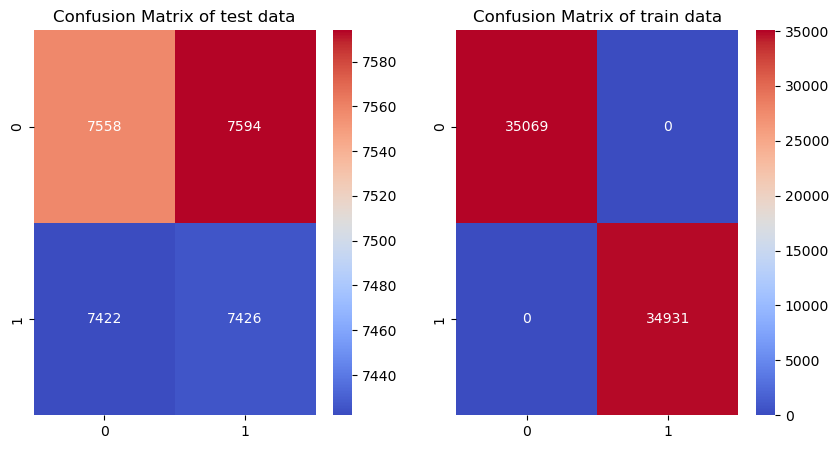

In [28]:
# decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
# test performance
print("Test performance of Decision Tree")
print("----------------------------------------------------------------------------")
print(classification_report(ytest,ypred))
print("----------------------------------------------------------------------------")
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of test data")
# train performance
ypred_train = dt.predict(xtrain)
print("Train performance of Decision Tree")
print("----------------------------------------------------------------------------")
print(classification_report(ytrain,ypred_train))
print("----------------------------------------------------------------------------")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of train data")
plt.show();
update_performance('Decision Tree',dt,ytest,ypred)

In [29]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.504767,0.422751,0.499642,0.457991
1,Decision Tree,0.499467,0.500135,0.494407,0.497255


Test performance of Random Forest
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.52      0.51     15152
           1       0.49      0.47      0.48     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

----------------------------------------------------------------------------
Train performance of Random Forest
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     35069
           1       1.00      1.00      1.00     34931

    accuracy                           1.00     70000
   macro avg       1.00      1.00      1.00     70000
weighted avg       1.00      1.00      1.00     70000

----------------------------------------------

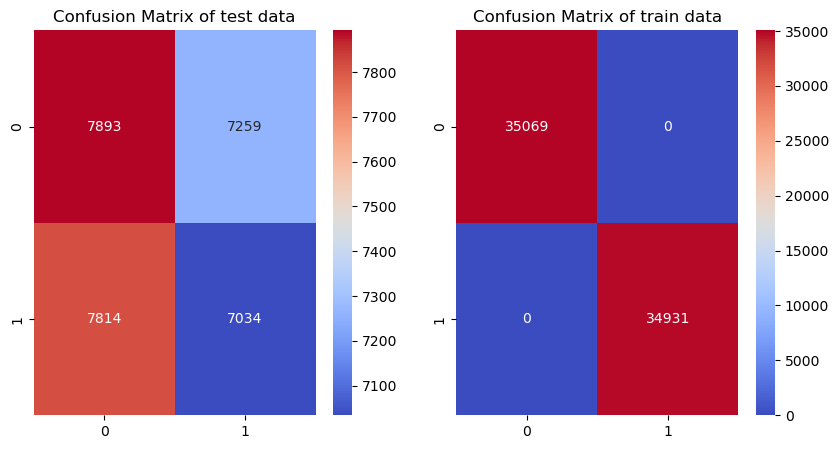

In [30]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(xtrain,ytrain)
ypred = rf.predict(xtest)
# test performance
print("Test performance of Random Forest")
print("----------------------------------------------------------------------------")
print(classification_report(ytest,ypred))
print("----------------------------------------------------------------------------")
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of test data")
# train performance
ypred_train = rf.predict(xtrain)
print("Train performance of Random Forest")
print("----------------------------------------------------------------------------")
print(classification_report(ytrain,ypred_train))
print("----------------------------------------------------------------------------")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of train data")
plt.show();
update_performance('Random Forest',rf,ytest,ypred)


In [31]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.504767,0.422751,0.499642,0.457991
1,Decision Tree,0.499467,0.500135,0.494407,0.497255
2,Random Forest,0.497567,0.473734,0.492129,0.482756


Test performance of XGBoost
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.51      0.51     15152
           1       0.50      0.49      0.49     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

----------------------------------------------------------------------------
Train performance of XGBoost
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.66      0.68      0.67     35069
           1       0.67      0.65      0.66     34931

    accuracy                           0.66     70000
   macro avg       0.67      0.66      0.66     70000
weighted avg       0.67      0.66      0.66     70000

----------------------------------------------------------

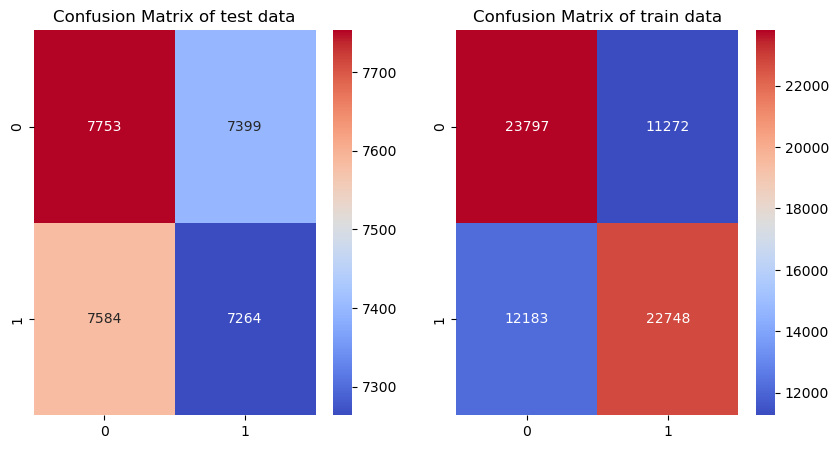

In [32]:
# xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=42)
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
# test performance
print("Test performance of XGBoost")
print("----------------------------------------------------------------------------")
print(classification_report(ytest,ypred))
print("----------------------------------------------------------------------------")
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of test data")
# train performance
ypred_train = xgb.predict(xtrain)
print("Train performance of XGBoost")
print("----------------------------------------------------------------------------")
print(classification_report(ytrain,ypred_train))
print("----------------------------------------------------------------------------")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of train data")
plt.show();
update_performance('XGBoost',xgb,ytest,ypred)

In [33]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.504767,0.422751,0.499642,0.457991
1,Decision Tree,0.499467,0.500135,0.494407,0.497255
2,Random Forest,0.497567,0.473734,0.492129,0.482756
3,XGBoost,0.500567,0.489224,0.495397,0.492291


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 34931, number of negative: 35069
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000904 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 596
[LightGBM] [Info] Number of data points in the train set: 70000, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499014 -> initscore=-0.003943
[LightGBM] [Info] Start training from score -0.003943
Test performance of LightGBM
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.56      0.53     15152
           1       0.50      0.45      0.47     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50    

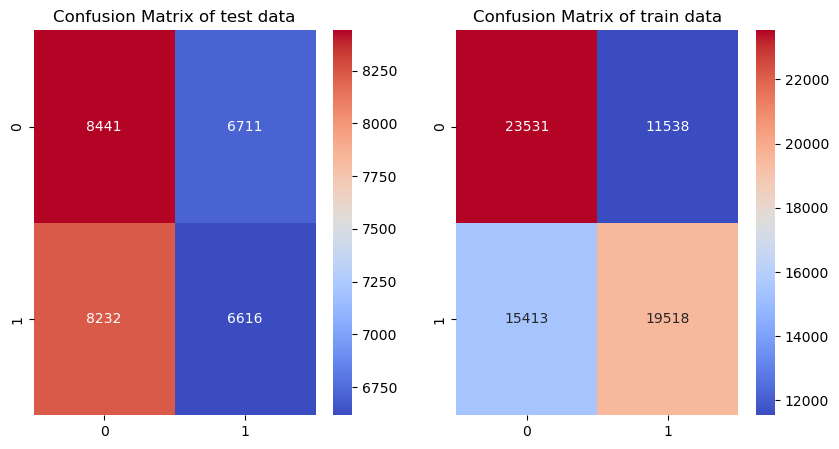

In [34]:
# lightgbm
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(xtrain,ytrain)
ypred = lgbm.predict(xtest)
# test performance
print("Test performance of LightGBM")
print("----------------------------------------------------------------------------")
print(classification_report(ytest,ypred))
print("----------------------------------------------------------------------------")
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of test data")
# train performance
ypred_train = lgbm.predict(xtrain)
print("Train performance of LightGBM")
print("----------------------------------------------------------------------------")
print(classification_report(ytrain,ypred_train))
print("----------------------------------------------------------------------------")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of train data")
plt.show();
update_performance('LightGBM',lgbm,ytest,ypred)

In [35]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.504767,0.422751,0.499642,0.457991
1,Decision Tree,0.499467,0.500135,0.494407,0.497255
2,Random Forest,0.497567,0.473734,0.492129,0.482756
3,XGBoost,0.500567,0.489224,0.495397,0.492291
4,LightGBM,0.501900,0.445582,0.496436,0.469636


Test performance of AdaBoost
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.53      0.52     15152
           1       0.50      0.48      0.49     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

----------------------------------------------------------------------------
Train performance of AdaBoost
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.54      0.53     35069
           1       0.52      0.49      0.50     34931

    accuracy                           0.52     70000
   macro avg       0.52      0.52      0.52     70000
weighted avg       0.52      0.52      0.52     70000

--------------------------------------------------------

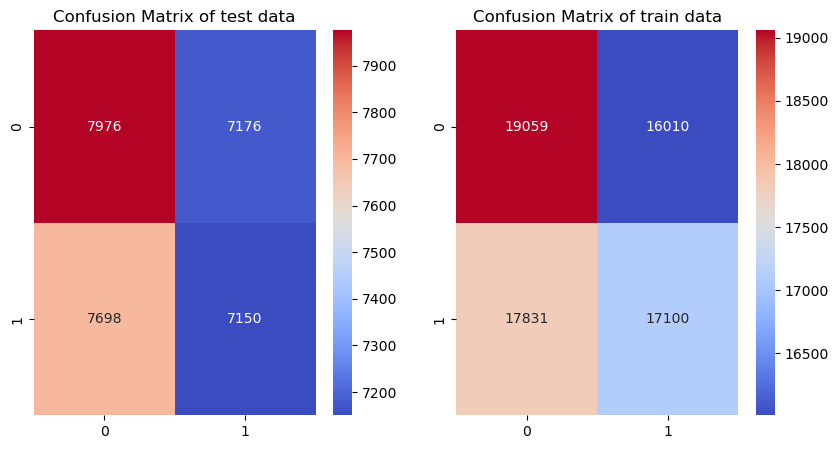

In [36]:
# ada boost
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=42)
ada.fit(xtrain,ytrain)
ypred = ada.predict(xtest)
# test performance
print("Test performance of AdaBoost")
print("----------------------------------------------------------------------------")
print(classification_report(ytest,ypred))
print("----------------------------------------------------------------------------")
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of test data")
# train performance
ypred_train = ada.predict(xtrain)
print("Train performance of AdaBoost")
print("----------------------------------------------------------------------------")
print(classification_report(ytrain,ypred_train))
print("----------------------------------------------------------------------------")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of train data")
plt.show();
update_performance('AdaBoost',ada,ytest,ypred)

In [37]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.504767,0.422751,0.499642,0.457991
1,Decision Tree,0.499467,0.500135,0.494407,0.497255
2,Random Forest,0.497567,0.473734,0.492129,0.482756
3,XGBoost,0.500567,0.489224,0.495397,0.492291
4,LightGBM,0.501900,0.445582,0.496436,0.469636
5,AdaBoost,0.504200,0.481546,0.499093,0.490162


Test performance of Gradient Boost
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.53      0.52     15152
           1       0.49      0.47      0.48     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

----------------------------------------------------------------------------
Train performance of Gradient Boost
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.54      0.58      0.56     35069
           1       0.54      0.51      0.53     34931

    accuracy                           0.54     70000
   macro avg       0.54      0.54      0.54     70000
weighted avg       0.54      0.54      0.54     70000

--------------------------------------------

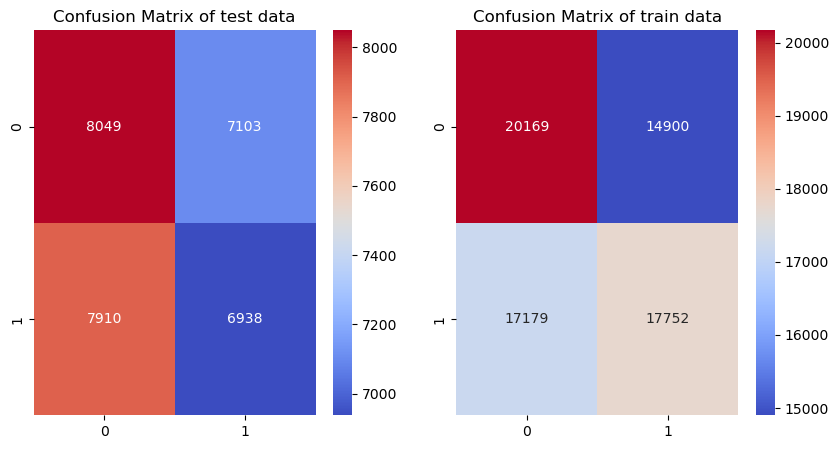

In [38]:
# gradient boost
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=42)
gb.fit(xtrain,ytrain)
ypred = gb.predict(xtest)
# test performance
print("Test performance of Gradient Boost")
print("----------------------------------------------------------------------------")
print(classification_report(ytest,ypred))
print("----------------------------------------------------------------------------")
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of test data")
# train performance
ypred_train = gb.predict(xtrain)
print("Train performance of Gradient Boost")
print("----------------------------------------------------------------------------")
print(classification_report(ytrain,ypred_train))
print("----------------------------------------------------------------------------")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of train data")
plt.show();
update_performance('Gradient Boost',gb,ytest,ypred)

In [39]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.504767,0.422751,0.499642,0.457991
1,Decision Tree,0.499467,0.500135,0.494407,0.497255
2,Random Forest,0.497567,0.473734,0.492129,0.482756
3,XGBoost,0.500567,0.489224,0.495397,0.492291
4,LightGBM,0.501900,0.445582,0.496436,0.469636
5,AdaBoost,0.504200,0.481546,0.499093,0.490162
6,Gradient Boost,0.499567,0.467268,0.494124,0.480321


Test performance of Naive Bayes
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.55      0.53     15152
           1       0.50      0.46      0.48     14848

    accuracy                           0.51     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.51      0.50     30000

----------------------------------------------------------------------------
Train performance of Naive Bayes
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.55      0.53     35069
           1       0.50      0.46      0.48     34931

    accuracy                           0.50     70000
   macro avg       0.50      0.50      0.50     70000
weighted avg       0.50      0.50      0.50     70000

--------------------------------------------------

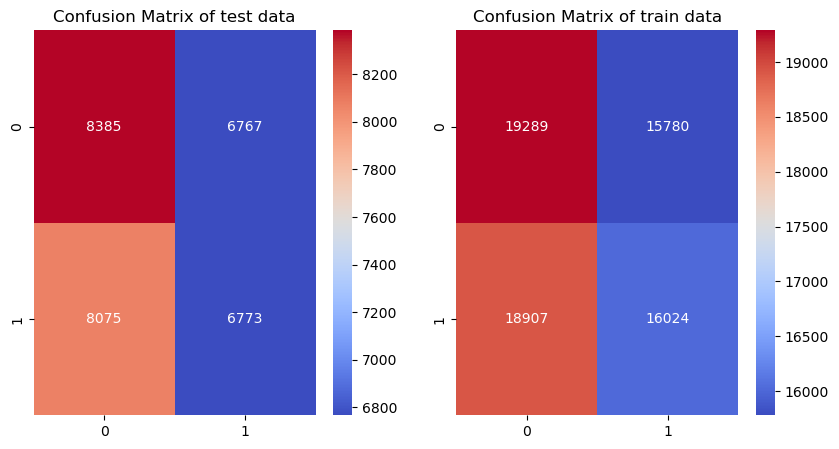

In [40]:
# naive bayes
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtrain,ytrain)
ypred = nb.predict(xtest)
# test performance
print("Test performance of Naive Bayes")
print("----------------------------------------------------------------------------")
print(classification_report(ytest,ypred))
print("----------------------------------------------------------------------------")
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of test data")
# train performance
ypred_train = nb.predict(xtrain)
print("Train performance of Naive Bayes")
print("----------------------------------------------------------------------------")
print(classification_report(ytrain,ypred_train))
print("----------------------------------------------------------------------------")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of train data")
plt.show();
update_performance('Naive Bayes',nb,ytest,ypred)

In [41]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.504767,0.422751,0.499642,0.457991
1,Decision Tree,0.499467,0.500135,0.494407,0.497255
2,Random Forest,0.497567,0.473734,0.492129,0.482756
3,XGBoost,0.500567,0.489224,0.495397,0.492291
4,LightGBM,0.501900,0.445582,0.496436,0.469636
5,AdaBoost,0.504200,0.481546,0.499093,0.490162
6,Gradient Boost,0.499567,0.467268,0.494124,0.480321
7,Naive Bayes,0.505267,0.456156,0.500222,0.477173


Test performance of KNN
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.50      0.50     15152
           1       0.49      0.49      0.49     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

----------------------------------------------------------------------------
Train performance of KNN
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.69      0.69      0.69     35069
           1       0.69      0.69      0.69     34931

    accuracy                           0.69     70000
   macro avg       0.69      0.69      0.69     70000
weighted avg       0.69      0.69      0.69     70000

------------------------------------------------------------------

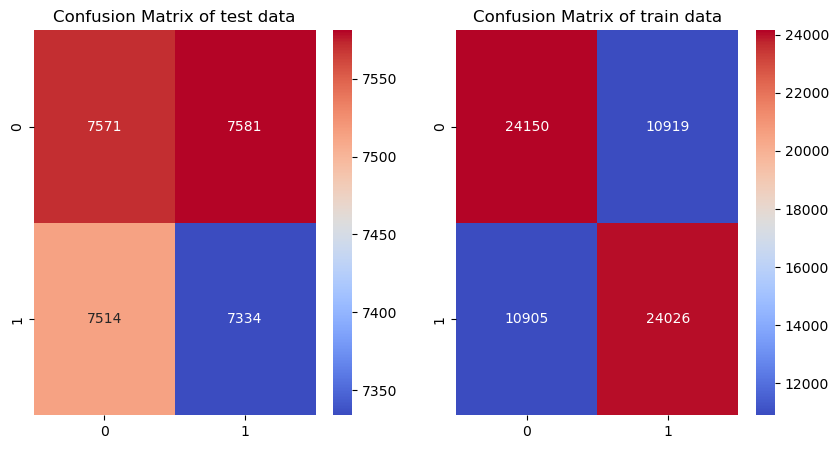

In [42]:
# knn
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(xtrain,ytrain)
ypred = knn.predict(xtest)
# test performance
print("Test performance of KNN")
print("----------------------------------------------------------------------------")
print(classification_report(ytest,ypred))
print("----------------------------------------------------------------------------")
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of test data")
# train performance
ypred_train = knn.predict(xtrain)
print("Train performance of KNN")
print("----------------------------------------------------------------------------")
print(classification_report(ytrain,ypred_train))
print("----------------------------------------------------------------------------")
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(ytrain,ypred_train),annot=True,cmap='coolwarm',fmt='g')
plt.title("Confusion Matrix of train data")
plt.show();
update_performance('KNN',knn,ytest,ypred)

In [43]:
perf_score

,Model,Accuracy,Recall,Precision,F1 Score
0,Logistic Regression,0.504767,0.422751,0.499642,0.457991
1,Decision Tree,0.499467,0.500135,0.494407,0.497255
2,Random Forest,0.497567,0.473734,0.492129,0.482756
3,XGBoost,0.500567,0.489224,0.495397,0.492291
4,LightGBM,0.501900,0.445582,0.496436,0.469636
5,AdaBoost,0.504200,0.481546,0.499093,0.490162
6,Gradient Boost,0.499567,0.467268,0.494124,0.480321
7,Naive Bayes,0.505267,0.456156,0.500222,0.477173
8,KNN,0.496833,0.493939,0.491720,0.492827


In [47]:
# hyperparameter tuning for xgboost
from sklearn.model_selection import GridSearchCV
hyper_params = {'max_depth': [2, 3, 5, 8],
                'lambda': [0.1, 0.5, 1.0],
                'gamma': [2, 3, 4 , 5],
                'min_child_weight': [0.1, 0.5, 1.0]}
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier(random_state=10)
grid_xgb = GridSearchCV(xgb, param_grid=hyper_params, cv=5, n_jobs=-1, verbose=1)
grid_xgb.fit(xtrain, ytrain)
print(grid_xgb.best_params_)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
{'gamma': 4, 'lambda': 0.5, 'max_depth': 8, 'min_child_weight': 0.5}


Test performance of XGBoost after hyperparameter tuning
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.50      0.51      0.50     15152
           1       0.49      0.49      0.49     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

----------------------------------------------------------------------------


<Axes: >

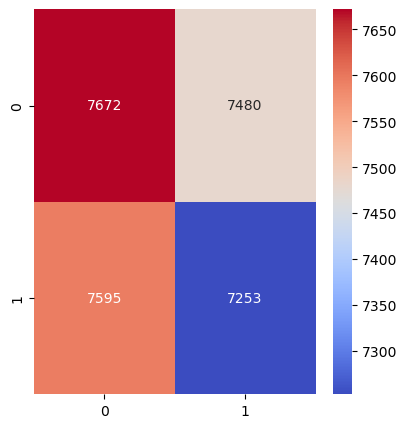

In [48]:
# model with best parameters
xgb = XGBClassifier(**grid_xgb.best_params_, random_state=42)
xgb.fit(xtrain,ytrain)
ypred = xgb.predict(xtest)
# test performance
print("Test performance of XGBoost after hyperparameter tuning")
print("----------------------------------------------------------------------------")
print(classification_report(ytest,ypred))
print("----------------------------------------------------------------------------")
plt.subplots(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(ytest,ypred),annot=True,cmap='coolwarm',fmt='g')

In [49]:
# pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([('scaler',StandardScaler()),('xgb',XGBClassifier(random_state=42))])
pipe.fit(xtrain,ytrain)
ypred = pipe.predict(xtest)
# test performance
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.51      0.51      0.51     15152
           1       0.50      0.49      0.49     14848

    accuracy                           0.50     30000
   macro avg       0.50      0.50      0.50     30000
weighted avg       0.50      0.50      0.50     30000

